<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Polinomio_de_legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## inciso a) Graficar en un solo panel los Polinomio de legenbre $P_n(x)$ para $n=0,1,\dots$

Para ello utilizando la libreria de `SymPy`, `NumPy` y `Matplotlib`.  

In [37]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#simbolo simbolicos
x = sp.symbols('x')

# Obtener los polinomios de Legendre P_n(x) para n = 0 a 5
Pn_exprs = [sp.legendre(n, x) for n in range(6)]

#  para evitar errores con constantes
Pn_funcs = []
x_vals = np.linspace(-1, 1, 400)


for expr in Pn_exprs:
    f=sp.lambdify(x,expr,modules="numpy")
    sample=f(x_vals)

    if np.isscalar(sample):
        f = lambda x_input, c=sample: np.full_like(x_input, c)
    Pn_funcs.append(f)



Evaluar y graficar

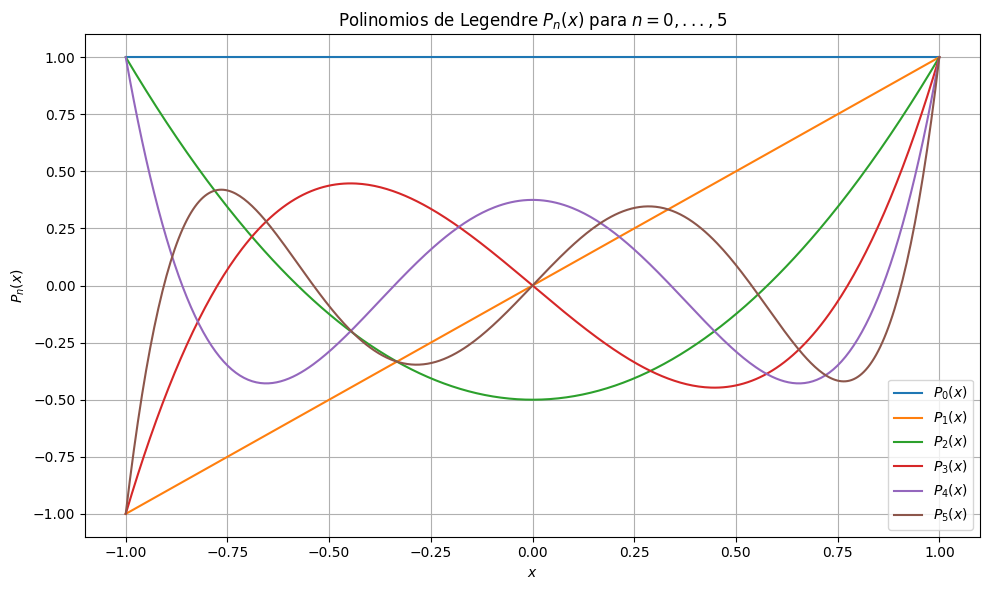

In [39]:

Pn_vals = [f(x_vals) for f in Pn_funcs]

plt.figure(figsize=(10, 6))
for n, y_vals in enumerate(Pn_vals):
    plt.plot(x_vals, y_vals, label=f'$P_{n}(x)$')

plt.title('Polinomios de Legendre $P_n(x)$ para $n = 0, ..., 5$')
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Inciso b).

Mostrar graficamente que se satisface la relacion o identidad de recurrencia para \( n = 3 \)

La identidad a verificar es:

$
(1 - x^2) P_n'(x) = (n+1)xP_n(x) - (n+1)P_{n+1}(x)
$

Para $n = 3$, esta relación se convierte en:

$
(1 - x^2) P_3'(x) = 4xP_3(x) - 4P_4(x)
$



Utilizando `SymPy`, se calcularán simbólicamente las expresiones del lado izquierdo y derecho, y luego se evaluarán en un conjunto de puntos $ x \in [-1, 1]$ usando `NumPy`. Finalmente, se graficarán ambas expresiones para comparar visualmente que son iguales.

In [47]:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definición simbólica
x = sp.symbols('x')
n = 3  # ← Cambia este valor si deseas verificar para otro n

# Polinomios de Legendre y su derivada
Pn   = sp.legendre(n, x)
Pn1  = sp.legendre(n + 1, x)
Pn_deriv = sp.diff(Pn, x)

# Definición de ambos lados de la identidad
lhs = (1 - x**2) * Pn_deriv
rhs = (n + 1)*x*Pn - (n + 1)*Pn1






Verificación

In [48]:

# Verificación simbólica
simplified = sp.simplify(lhs - rhs)
print("¿Ambos lados son simbólicamente iguales?:", simplified == 0)
print("Simplificación simbólica:", simplified)

# Evaluación numérica con NumPy
lhs_func = sp.lambdify(x, lhs, "numpy")
rhs_func = sp.lambdify(x, rhs, "numpy")

x_vals = np.linspace(-1, 1, 400)
lhs_vals = lhs_func(x_vals)
rhs_vals = rhs_func(x_vals)

¿Ambos lados son simbólicamente iguales?: True
Simplificación simbólica: 0


Grafica

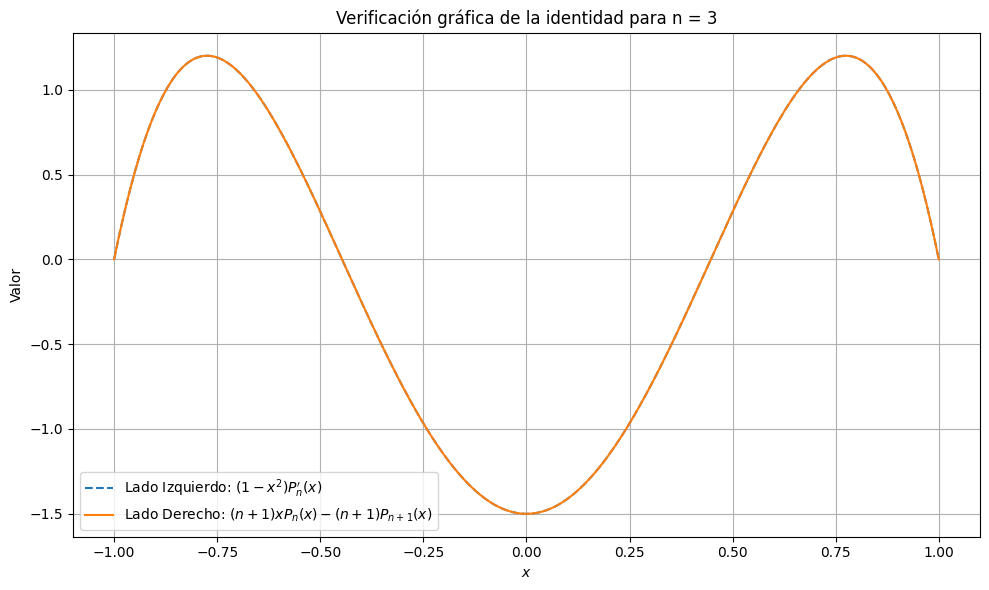

In [42]:
# Gráfica comparativa
plt.figure(figsize=(10, 6))
plt.plot(x_vals, lhs_vals, '--', label='Lado Izquierdo: $(1 - x^2)P_n\'(x)$')
plt.plot(x_vals, rhs_vals, '-', label='Lado Derecho: $(n+1)xP_n(x) - (n+1)P_{n+1}(x)$')
plt.title(f'Verificación gráfica de la identidad para n = {n}')
plt.xlabel('$x$')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Inciso (c) Mostrar algebraicamente la identidad de recurrencia para \( n = 3 \)

La identidad a verificar es:

$
(1 - x^2) P_n'(x) = (n + 1)xP_n(x) - (n + 1)P_{n+1}(x)
$

Para $ n = 3 $, esta se convierte en:

$
(1 - x^2) P_3'(x) = 4x P_3(x) - 4 P_4(x)
$






Utilizando únicamente `SymPy` y la función `legendre`, se define simbólicamente la identidad, se deriva \( P_3(x) \), y se aplica `simplify` a la diferencia entre ambos lados.  
Si el resultado es cero, se verifica que la relación se cumple **algebraicamente**.

In [49]:
import sympy as sp

# Símbolos
x = sp.symbols('x')
n = 3

# Definición de polinomios y derivada
P3 = sp.legendre(n, x)
P4 = sp.legendre(n + 1, x)
dP3 = sp.diff(P3, x)

# Identidad a verificar: (1 - x²)P3' = 4xP3 - 4P4
lhs = (1 - x**2) * dP3
rhs = (n + 1)*x*P3 - (n + 1)*P4

# Simplificación simbólica
diferencia = sp.simplify(lhs - rhs)

print("Resultado de la simplificación simbólica:")
sp.pprint(diferencia)
print("\n¿La identidad se cumple?:", diferencia == 0)


Resultado de la simplificación simbólica:
0

¿La identidad se cumple?: True


### Inciso (d) Mostrar algebraicamente que se satisface la identidad de recurrencia para $ P_n(x) $


$
(n + 1) P_{n+1}(x) - (2n + 1)x P_n(x) + n P_{n-1}(x) = 0
$




Lo haremos simbólicamente que los polinomios de Legendre satisfacen la siguiente identidad

In [44]:
import sympy as sp

# Declaración simbólica
x = sp.symbols('x')
n = 3

# Definimos los polinomios P_{n-1}, P_n y P_{n+1}
Pn_1 = sp.legendre(n - 1, x)
Pn   = sp.legendre(n, x)
Pn1  = sp.legendre(n + 1, x)

# Construimos la identidad a verificar
identidad = (n + 1)*Pn1 - (2*n + 1)*x*Pn + n*Pn_1

# Simplificamos
resultado = sp.simplify(identidad)

# Resultados
print("=== Identidad simbólica evaluada en n = 3 ===")
sp.pprint(identidad)
print("\n=== Resultado de la simplificación ===")
sp.pprint(resultado)
print("\n¿Se cumple la identidad? ", resultado == 0)


=== Identidad simbólica evaluada en n = 3 ===
    4       2       ⎛   3      ⎞
35⋅x    21⋅x        ⎜5⋅x    3⋅x⎟
───── - ───── - 7⋅x⋅⎜──── - ───⎟
  2       2         ⎝ 2      2 ⎠

=== Resultado de la simplificación ===
0

¿Se cumple la identidad?  True


### Inciso (e) Muestre que se cumple la formula de Podrigues, ejemplificando para $ n = 0, 1, \dots, 5 $

La fórmula de Rodrigues nos permite construir los polinomios de Legendre mediante derivadas sucesivas:

$
P_n(x) = \frac{1}{2^n n!} \cdot \frac{d^n}{dx^n} \left[ (x^2 - 1)^n \right]
$
En este inciso se verificará que para los n esta fórmula genera los mismos polinomios que la función `legendre(n, x)` de `SymPy`.  
La verificación se hará comparando ambos resultados simbólicamente con `simplify`.


In [46]:
import sympy as sp

# Declarar variable simbólica
x = sp.symbols('x')

# Encabezado
print("=== Verificación de la Fórmula de Rodrigues para P_n(x) ===\n")

# Iterar para n = 0 a 5
for n in range(6):
    # Polinomio de Legendre por fórmula de Rodrigues
    base = (x**2 - 1)**n
    derivada_n = sp.diff(base, x, n)
    rodrigues = (1 / (2**n * sp.factorial(n))) * derivada_n

    # Polinomio de Legendre directo desde SymPy
    legendre_directo = sp.legendre(n, x)

    # Verificación simbólica
    diferencia = sp.simplify(rodrigues - legendre_directo)

    # Imprimir resultados
    print(f" Para n = {n}")
    print("Rodrigues:        ", rodrigues)
    print("Legendre directo: ", legendre_directo)
    print("¿Coinciden?:      ", " Sí" if diferencia == 0 else " No")
    print("-" * 60)


=== Verificación de la Fórmula de Rodrigues para P_n(x) ===

 Para n = 0
Rodrigues:         1
Legendre directo:  1
¿Coinciden?:        Sí
------------------------------------------------------------
 Para n = 1
Rodrigues:         x
Legendre directo:  x
¿Coinciden?:        Sí
------------------------------------------------------------
 Para n = 2
Rodrigues:         (3*x**2 - 1)/2
Legendre directo:  3*x**2/2 - 1/2
¿Coinciden?:        Sí
------------------------------------------------------------
 Para n = 3
Rodrigues:         x*(5*x**2 - 3)/2
Legendre directo:  5*x**3/2 - 3*x/2
¿Coinciden?:        Sí
------------------------------------------------------------
 Para n = 4
Rodrigues:         (8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
Legendre directo:  35*x**4/8 - 15*x**2/4 + 3/8
¿Coinciden?:        Sí
------------------------------------------------------------
 Para n = 5
Rodrigues:         x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8
Legendre directo:  63*x**5/8 - 35*x